Optimal number of features: 17
Best features: mean radius, mean texture, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, texture error, perimeter error, worst radius, worst texture, worst perimeter, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry


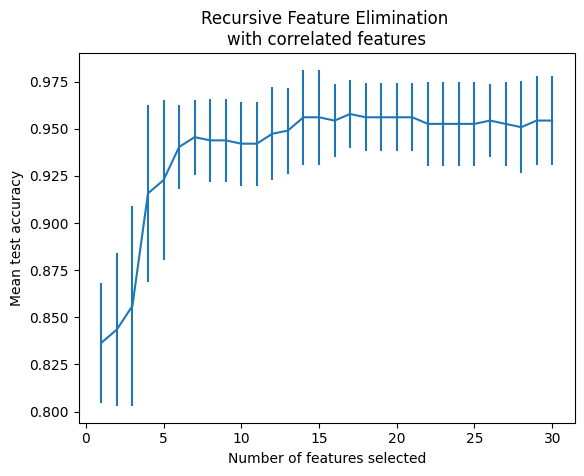

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

clf = LogisticRegression(max_iter=5000)
cv = StratifiedKFold(10)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=1,
    n_jobs=8,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")

# Get the best features' names
best_features = data.feature_names[rfecv.support_]
print("Best features:", ", ".join(best_features))

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()
